<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_abril_2020/blob/master/05_ANN_fotos_testa_variaveis_duas_classes_avalia_abril_08_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# rede neural com duas classes grao=2 e nao grao=1+3

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import math
import pandas as pd
#from sklearn.neural_network import MLPRegressor
#from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
import re
%matplotlib inline

In [3]:
'''
!git clone https://github.com/ucfilho/marquesgabi_mar_2020 #clonar do Github
%cd marquesgabi_mar_2020

!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
'''

'\n!git clone https://github.com/ucfilho/marquesgabi_mar_2020 #clonar do Github\n%cd marquesgabi_mar_2020\n\n!git clone https://github.com/marquesgabi/Doutorado\n%cd Doutorado\n'

In [0]:
#!ls

In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras



print(tf.__version__)

2.2.0-rc2


In [0]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names = ['buraco', 'outros']

In [7]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
!pip install mahotas
import Go2BlackWhite
import Go2Mahotas
import mahotas.features.texture as mht
import mahotas.features
import zipfile
import re
from sklearn.model_selection import train_test_split

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [8]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 227 (delta 36), reused 0 (delta 0), pack-reused 147
Receiving objects: 100% (227/227), 87.41 MiB | 29.53 MiB/s, done.
Resolving deltas: 100% (105/105), done.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
Transfere='Fotos9Amostras720.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:

Size=28 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

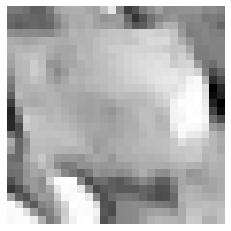

In [11]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")

In [12]:
np.array(ww).shape

(720, 28, 28)

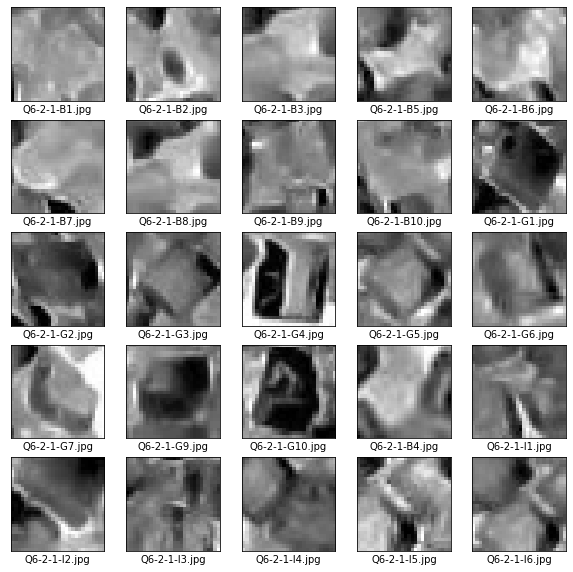

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap=plt.cm.binary)
    plt.xlabel(img_name[i])
plt.show()

In [14]:
y_valor=[]
Grao='G'
for x in img_name:
  if re.search(Grao, x):
    y_valor.append(1)
  else:
    y_valor.append(2)
print(y_valor)
print(len(y_valor))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 

In [15]:
'''
W_train, W_test, yw_train, yw_test = train_test_split(ww, y_valor, 
                                                    test_size=0.20, 
                                                    random_state=42)
'''

'\nW_train, W_test, yw_train, yw_test = train_test_split(ww, y_valor, \n                                                    test_size=0.20, \n                                                    random_state=42)\n'

In [0]:
W_train, W_test, yw_train, yw_test = train_test_split(np.array(ww), np.array(y_valor), 
                                                    test_size=0.20, 
                                                    random_state=42)

In [0]:
train_images=W_train
train_labels=yw_train
test_images=W_test
test_labels=yw_test

In [18]:
print(np.array(W_train).shape)
print(np.array(W_test).shape)

(576, 28, 28)
(144, 28, 28)


In [19]:
print(yw_train)
print('=====================')
print(yw_test)

[1 1 2 1 2 1 2 2 2 2 1 2 1 1 2 2 2 2 1 1 1 2 2 1 2 2 1 1 1 2 2 1 2 2 2 1 2
 2 2 1 2 2 1 2 2 2 2 2 1 2 2 1 2 2 1 2 1 2 2 2 1 2 1 1 1 2 2 2 2 1 1 2 1 1
 1 2 2 1 1 1 2 1 1 2 1 2 1 2 2 1 2 1 1 2 1 1 2 1 1 2 2 1 1 1 2 2 1 2 2 1 1
 2 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1
 1 1 2 2 2 1 1 1 1 1 2 2 1 2 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1
 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2 1 2 1 1 1 2 2 2 2 1 1 1 2
 2 1 1 1 1 2 2 2 1 2 1 1 2 1 2 2 1 1 2 2 2 1 2 1 1 2 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 2 1 2 1 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 1 2 2 1 2 1 2 2 2 1 1 2 2 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 2 1 1 2 1
 2 1 2 2 1 2 1 2 1 2 1 2 2 1 1 1 1 2 2 1 2 1 2 1 2 2 2 1 2 1 2 1 2 1 2 1 1
 2 2 2 1 2 2 2 2 1 1 1 2 1 2 1 2 2 1 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 2 2
 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1
 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 1 2 1 2 2 2 1 1 2 2 2
 2 1 1 2 2 1 1 1 2 2 1 1 

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
18/18 [==============================] - 0s 2ms/step - loss: 61.0428 - accuracy: 0.6267 
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 8.4953 - accuracy: 0.8229
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 3.7141 - accuracy: 0.8889
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 2.7724 - accuracy: 0.9028
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 7.6915 - accuracy: 0.8316
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 13.6405 - accuracy: 0.7934
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 4.6171 - accuracy: 0.8872
Epoch 8/10
18/18 [==============================] - 0s 2ms/step - loss: 5.9268 - accuracy: 0.8802
Epoch 9/10
18/18 [==============================] - 0s 2ms/step - loss: 3.8784 - accuracy: 0.9062
Epoch 10/10
18/18 [==============================] - 0s 2ms/step - loss: 1.7091 - accuracy: 0.9410


In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

5/5 - 0s - loss: 7.1109 - accuracy: 0.8542

Test accuracy: 0.8541666865348816


In [24]:
# Evaluating the Algorithm
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

NameError: ignored